In [1]:
# PEKAN 4: PEMODELAN INTI (CLUSTERING K-MEANS)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# 1. LOAD DATA MASTER
# Kita memuat data hasil penggabungan (merge) dan perhitungan SGI
from google.colab import drive
drive.mount('/content/drive')

# Jika Anda menaruh shortcut langsung di "My Drive", maka path-nya adalah:
path = '/content/drive/MyDrive/master_data_pekan2.csv'
df_master = pd.read_csv(path)

# Cek apakah berhasil dimuat
print(df_master.head())

Mounted at /content/drive
   year province                  vocational_major        skill_name  \
0  2023     Aceh  Teknik Komputer & Jaringan (TKJ)   Cloud Computing   
1  2023     Aceh  Teknik Komputer & Jaringan (TKJ)    Cyber Security   
2  2023     Aceh    Rekayasa Perangkat Lunak (RPL)   Web Development   
3  2023     Aceh    Rekayasa Perangkat Lunak (RPL)    Data Analytics   
4  2023     Aceh     Teknik Otomasi Industri (TOI)  Otomasi Industri   

   total_demand  avg_salary_offered  total_supply  certification_rate  \
0          2060            11350634          1301                0.47   
1          2295             9104572           739                0.63   
2          2838             7034489          1639                0.43   
3          1666            12004212          1938                0.42   
4          1330             9323669          1482                0.43   

        SGI status_gap  
0  0.368447    Waspada  
1  0.677996     Kritis  
2  0.422481    Waspada  
3 

In [3]:
# 2. SELEKSI FITUR & STANDARISASI
# Fitur utama untuk clustering: SGI (Kesenjangan) dan Gaji (Nilai Ekonomi)
features = ['SGI', 'avg_salary_offered']
X = df_master[features].dropna()

# Wajib Scaling karena SGI (0-1) dan Gaji (Jutaan) skalanya sangat beda
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

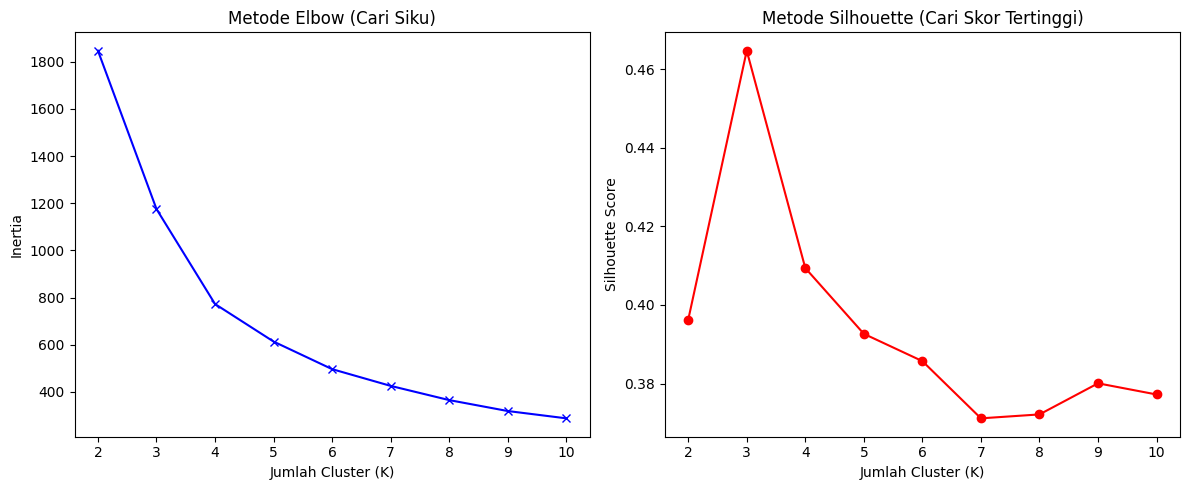

In [4]:
# 3. MENCARI K OPTIMAL (METODE ELBOW & SILHOUETTE)
# Kita coba K dari 2 sampai 10
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    # Menggunakan k-means++ sesuai spesifikasi tugas
    model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)

    inertia.append(model.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bx-')
plt.title('Metode Elbow (Cari Siku)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, 'ro-')
plt.title('Metode Silhouette (Cari Skor Tertinggi)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [5]:
# 4. IMPLEMENTASI MODEL FINAL (K-MEANS++)
# Berdasarkan grafik, kita pilih K=3 (Optimal untuk data profil wilayah)
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df_master['cluster_label'] = final_kmeans.fit_predict(X_scaled)

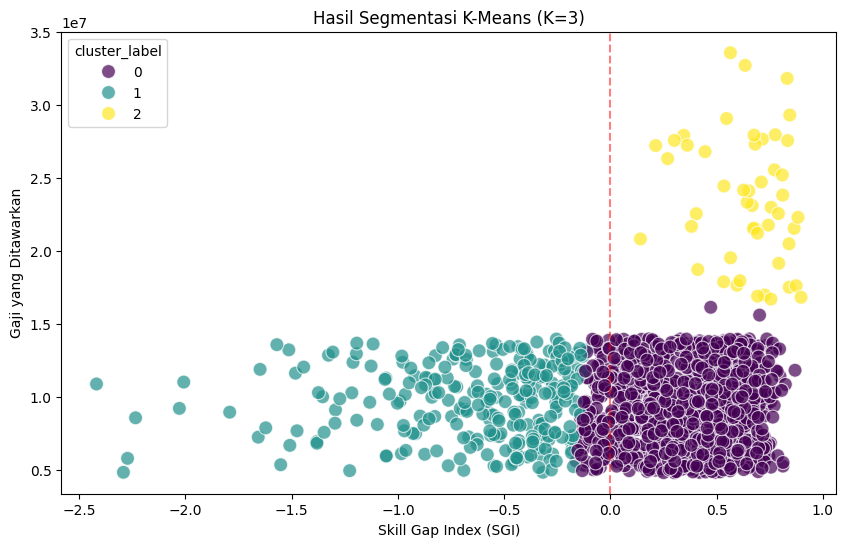

In [6]:
# 5. VISUALISASI HASIL CLUSTERING
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_master, x='SGI', y='avg_salary_offered',
                hue='cluster_label', palette='viridis', s=100, alpha=0.7)
plt.axvline(0, color='red', linestyle='--', alpha=0.5) # Batas Gap vs Surplus
plt.title(f'Hasil Segmentasi K-Means (K={optimal_k})')
plt.xlabel('Skill Gap Index (SGI)')
plt.ylabel('Gaji yang Ditawarkan')
plt.show()

In [7]:
# 6. INTEGRASI CLUSTER KE DATAFRAME & SIMPAN
df_master.to_csv('master_data_pekan4_berlabel.csv', index=False)
print("Pekan 4 Selesai! Model terlatih dan data berlabel tersimpan.")

Pekan 4 Selesai! Model terlatih dan data berlabel tersimpan.
